## Regex for test

### ab?c.|[0-9]\\[

In [1]:
input_regex = 'ab?c.|[0-9]\['

params = {
    'range': ['0-9'],
    'repeat': ['0,1']
}
    
nodes = {
    # functions (except any)
    -1: 'params', 
    0: 'seq', 
    1: 'atom', 
    2: 'any', 
    3: 'repeat', 
    4: 'alt', 
    5: 'altgroup', 
    6: 'group', 
    7: 'range', 
    8: 'escape', 

    # terminals (get by input regex)
    9: 'a', 
    10: 'b', 
    11: 'c', 
    12: '['
}

incidence_list = [
    (0, 4), (4, 5), (5, 1), (1, 9), (5, 3), 
    (3, 1), (1, 10), (5, 1), (1, 11), (5, 2), 
    (4, 5), (5, 7), (5, 8), (8, 12)
]

### Prepare test strings

In [2]:
from coevolutionary.utils import Utils
from coevolutionary.utils import regex_process

test_strings = Utils.get_test_strings(
    input_regex=input_regex,
    n_fuzzy_strings=5
)

X, Y = Utils.create_training_set(
    test_strings=test_strings,
    original_regex=input_regex,
    process_func=regex_process,
)  

## Competitive coevolution

In [3]:
from coevolutionary.manager import CompetitiveManager
from coevolutionary.algorithms.de import DEAlgorithm

In [4]:
cm = CompetitiveManager(
    adaptive_interval=5,
    shared_resource=50000,
    verbose=False,
    problem='min',
    survive_schema='best',
    social_card=0.3,
    penalty=0.05,
    seed=3956,
)

### only DE coevolutionary

In [5]:
params_cases = [
    {'ndim': 15 * 2, 'bounds': [0, 12], 'cr': 0.25, 'f': 0.25, 'mu': 300},
    {'ndim': 10 * 2, 'bounds': [0, 12], 'cr': 0.25, 'f': 0.25, 'mu': 300},
    {'ndim': 5 * 2, 'bounds': [0, 12], 'cr': 0.25, 'f': 0.25, 'mu': 300},
    {'ndim': 15 * 2, 'bounds': [0, 12], 'cr': 0.25, 'f': 0.3, 'mu': 300},
    {'ndim': 10 * 2, 'bounds': [0, 12], 'cr': 0.25, 'f': 0.3, 'mu': 300},
    {'ndim': 5 * 2, 'bounds': [0, 12], 'cr': 0.25, 'f': 0.3, 'mu': 300}
]

for i, case in enumerate(params_cases):
    de_object = DEAlgorithm(
        incidence_list=incidence_list,
        nodes=nodes,
        params=params,
        X=X,
        Y=Y,
        n_iter=100
    )
    
    cm.add_algorithm(
        name=f'de_{i}',
        init_params=case,
        init_algorithm=de_object.init_algorithm,
        init_population=de_object.init_population,
        get_fitness_population=de_object.get_fitness_population,
        select_population=de_object.select_population,
        recombine_population=de_object.recombine_population,
        mutate_population=de_object.mutate_population,
    )

In [6]:
cm.run_coevolution()

Done in 133.332 seconds


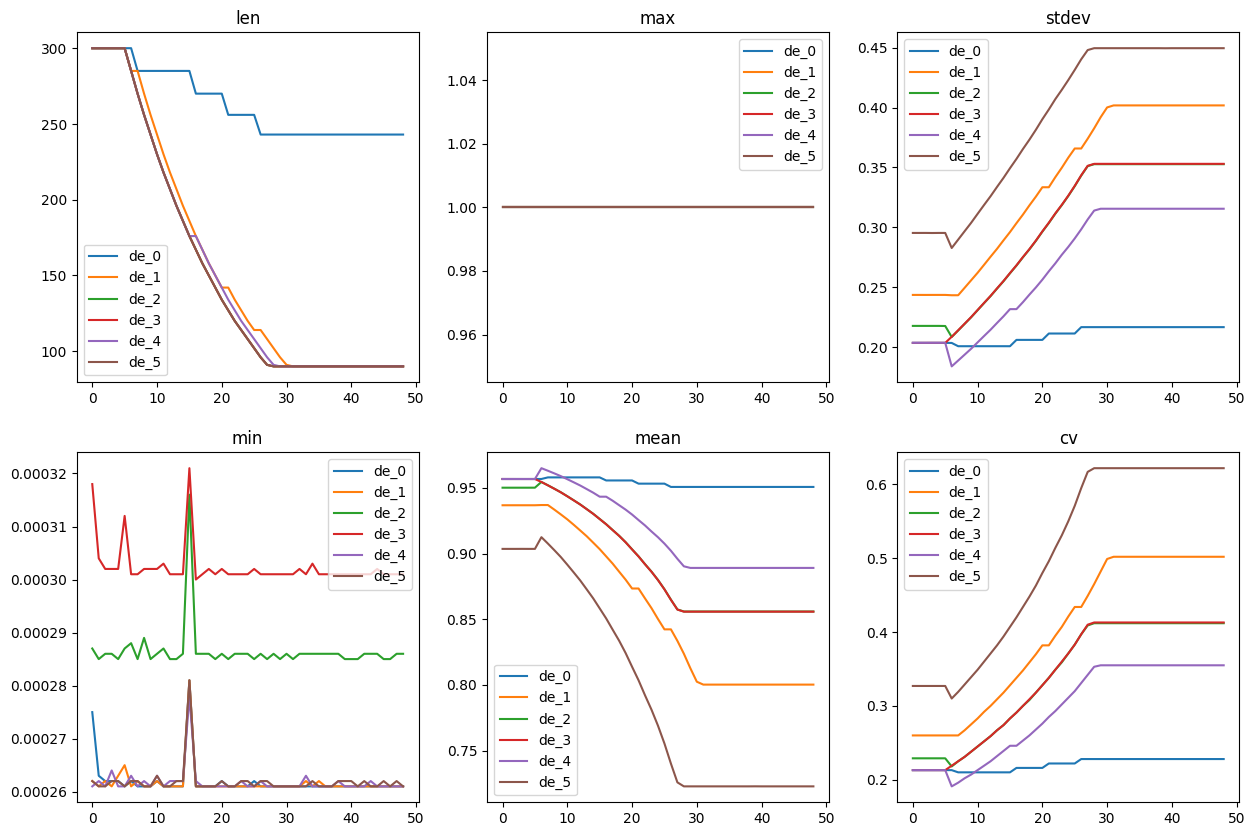

In [7]:
from coevolutionary.utils.visualization import visualize
visualize(
    algorithm_history=cm.algorithm_history,
    algorithm_names=cm.get_algorithm_names()
)

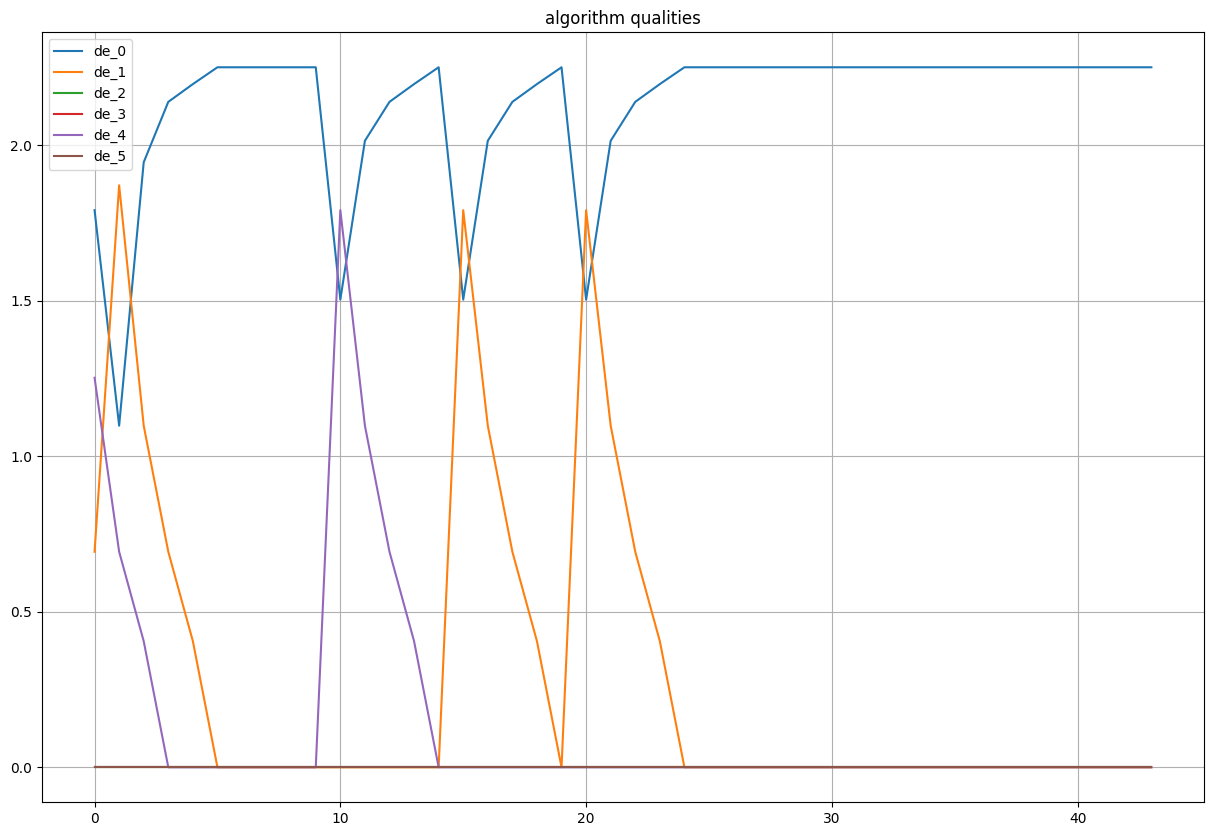

In [8]:
from coevolutionary.utils.visualization import visualize_algorithms_quality
visualize_algorithms_quality(
    population_qualities_history=cm.population_qualities_history,
    algorithm_names=cm.get_algorithm_names()
)